In [11]:
import pandas as pd
import matplotlib.pyplot as plt
from io import BytesIO
import base64
import zipfile
import urllib.request

In [12]:
url = 'https://www.hacienda.gob.es/Documentacion/Publico/Tributos/Estadisticas/IP/2020/Graficos-Libro-IP-2020.zip'
nombre_archivo = 'Graficos-Libro-IP-2020.zip' 
# descargo el archivo zip desde la URL de hacienda
urllib.request.urlretrieve(url, nombre_archivo)
#descomprimo el zip y extraigo el archivo excel 
excel = 'G_12 Libro IP 2020.xlsx'
with zipfile.ZipFile(nombre_archivo, 'r') as zip_ref:
    zip_ref.extractall()

    excel = zip_ref.namelist()[11]
cuadro = pd.read_excel(excel)

In [13]:
cuadro

,Unnamed: 0,Tipo medio,Tipo efectivo
0,Comunidad de Madrid,0.009654,0.000000
1,No residentes,0.009039,0.007845
2,Ceuta,0.007749,0.003679
3,TOTAL,0.007547,0.004113
4,Illes Balears,0.007166,0.007155
5,Comunidad Valenciana,0.006816,0.006810
6,Extremadura,0.006752,0.006751
7,Región de Murcia,0.006648,0.006647
8,Andalucía,0.006437,0.006428
9,Principado de Asturias,0.006410,0.006379


In [14]:
cuadro = cuadro.drop([1, 3]) #elimino las filas

In [20]:
cuadro

,Tipo medio,Tipo efectivo
Comunidad autónoma,,
Comunidad de Madrid,0.009654,0.000000
Ceuta,0.007749,0.003679
Illes Balears,0.007166,0.007155
Comunidad Valenciana,0.006816,0.006810
Extremadura,0.006752,0.006751
Región de Murcia,0.006648,0.006647
Andalucía,0.006437,0.006428
Principado de Asturias,0.006410,0.006379
Galicia,0.006397,0.006396


In [16]:
cuadro.rename(columns={'Unnamed: 0': 'Comunidad autónoma'}, inplace=True) #renombro la columna

In [17]:
cuadro = cuadro.set_index('Comunidad autónoma') #transformo en indice la columna Comunidad autónoma

In [21]:
cuadro.to_csv('patrimonio.csv', index=True)

#### Tipo medio: También conocido como tasa impositiva media, es el porcentaje de impuestos pagados sobre el ingreso total. Se calcula dividiendo el monto total de impuestos pagados por el ingreso bruto. El tipo medio no tiene en cuenta las deducciones, exenciones u otros factores que podrían afectar la cantidad real de impuestos pagados. Es un indicador general de la carga impositiva, pero no refleja necesariamente la cantidad real de impuestos que se pagan

#### Tipo efectivo: También conocido como tasa impositiva efectiva, es el porcentaje real de impuestos pagados sobre el ingreso neto después de aplicar todas las deducciones, exenciones y otros factores que podrían afectar la cantidad de impuestos adeudados. El tipo efectivo es una medida más precisa de la carga impositiva real y puede variar ampliamente según la situación individual o empresarial 

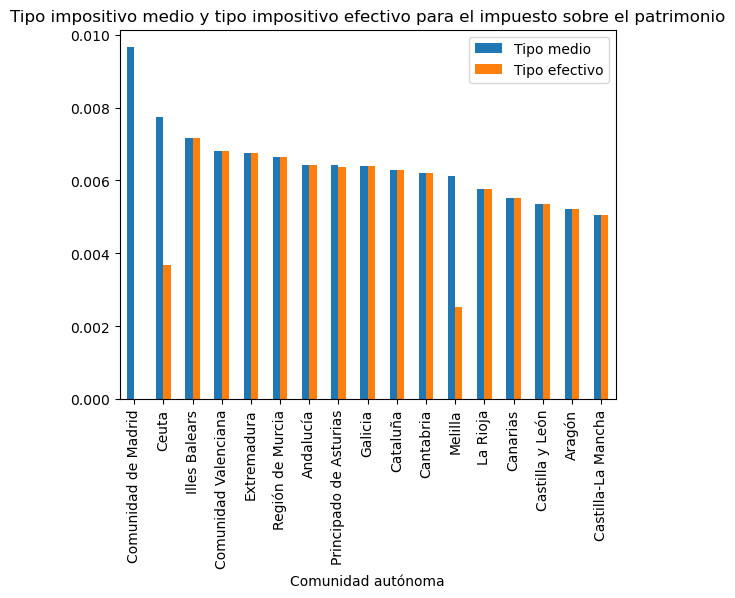

In [19]:
#cuadro.plot.line(x='Comunidad autónoma', y=['Tipo medio', 'Tipo efectivo'])
cuadro[['Tipo medio', 'Tipo efectivo']].plot(kind='bar')
plt.title('Tipo impositivo medio y tipo impositivo efectivo para el impuesto sobre el patrimonio')
plt.savefig('imp_patr.png')
plt.show()

## Carga en MongoDB

In [17]:
from pymongo import MongoClient

In [18]:
MongoClient(host=['localhost:27017'], document_class=dict, tz_aware=False, connect=True)

str_conn = 'mongodb://localhost:27017'   # str_con por defecto

cursor = MongoClient(str_conn)

cursor

MongoClient(host=['localhost:27017'], document_class=dict, tz_aware=False, connect=True)

In [19]:
db = cursor.dumping_mad

In [20]:
colec = db.n_colec

In [21]:
db.list_collection_names()

['n_colec']

In [22]:
i_p_madrid = cuadro.to_dict(orient='list')

In [23]:
colec.insert_one(i_p_madrid)